In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_train = pd.read_csv('application_train.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_train.shape

(307511, 122)

Missing values

In [4]:
def missing_value_table(df):
    # Calculate all missing values
    mis_val = df.isnull().sum()
    # In percent
    mis_val_percent = 100*df.isnull().sum()/len(df)
    # Merge
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    mis_val_rename = mis_val_table.rename(columns = {0:'Missing values', 1:'% of total values'})
    # Remove and sort
    mis_val_rename = mis_val_rename[mis_val_rename.iloc[:,1]!=0].sort_values('% of total values',
                                                                            ascending=False)
    return mis_val_rename

In [5]:
# Print top 10 values with non-missing values
missing_value_table(app_train)[:10]

,Missing values,% of total values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


Object type processing

In [6]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
# Count number of different values in each object type
app_train.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [8]:
# Transform non-numerical values into numerical labels
le = LabelEncoder()
for col in app_train:
    # if the type of a column is object 
    if app_train[col].dtype == 'object':
        # and number of unique items in this column <= 2
        if len(list(app_train[col].unique()))<=2:
            le.fit(app_train[col])
            app_train[col]=le.transform(app_train[col])

In [9]:
app_train = pd.get_dummies(app_train)
app_train.shape

(307511, 243)

Exploratory Data Analysis (EDA)

In [10]:
train_labels = app_train['TARGET']
app_train['DAYS_BIRTH'][:5]

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [11]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [12]:
(app_train['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

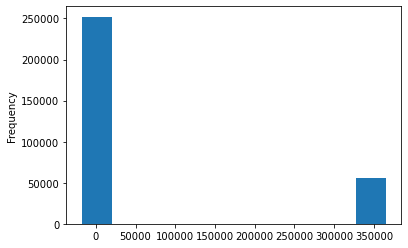

In [13]:
app_train['DAYS_EMPLOYED'].plot.hist()
plt.show()

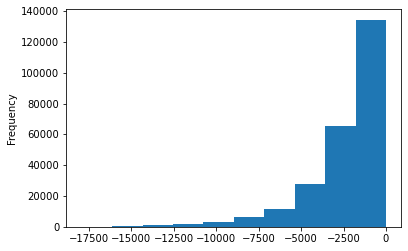

In [14]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)
app_train['DAYS_EMPLOYED'].plot.hist()
plt.show()

In [15]:
correlations = app_train.corr()['TARGET'].sort_values()
correlations.head()

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
Name: TARGET, dtype: float64

In [16]:
correlations.tail()

REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

In [17]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['TARGET'].corr(app_train['DAYS_BIRTH'])

-0.07823930830982712

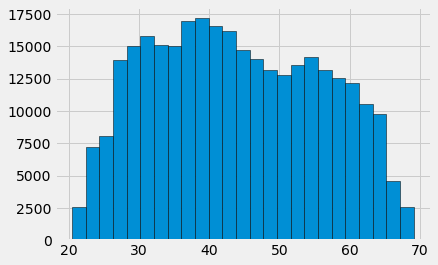

In [18]:
plt.style.use('fivethirtyeight')
plt.hist(app_train['DAYS_BIRTH']/365,edgecolor='k',bins=25)
plt.show()

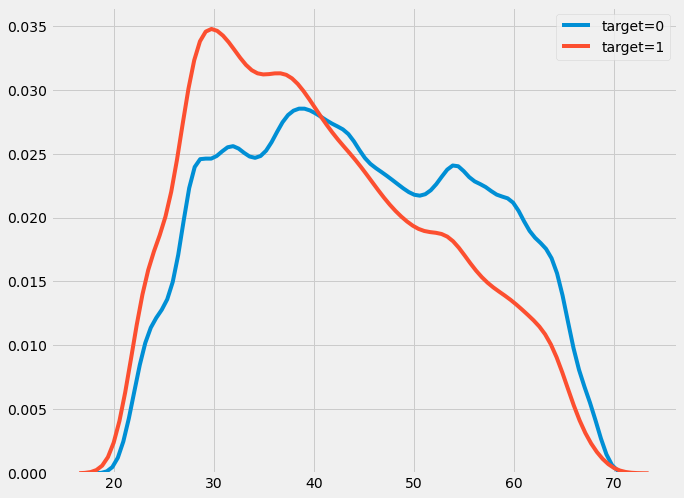

In [19]:
plt.figure(figsize=(10,8))
sns.kdeplot(app_train.loc[app_train['TARGET']==0, 'DAYS_BIRTH']/365, label='target=0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1, 'DAYS_BIRTH']/365, label='target=1')
plt.show()

In [20]:
age_data = app_train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num = 11))
age_data.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [21]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


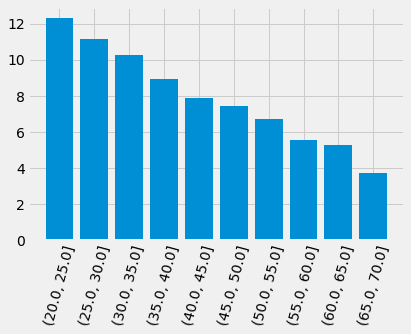

In [22]:
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
plt.xticks(rotation=75)
plt.show()

In [23]:
ext_data = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


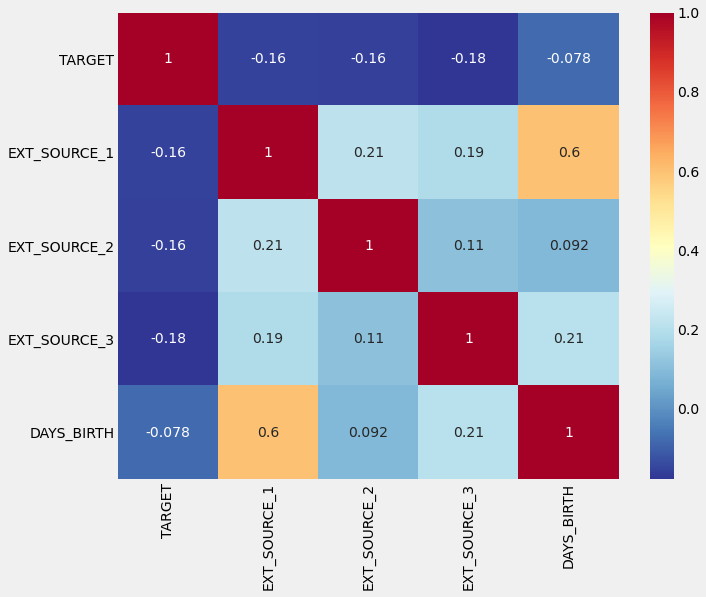

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(ext_data_corrs,cmap = plt.cm.RdYlBu_r, annot=True)

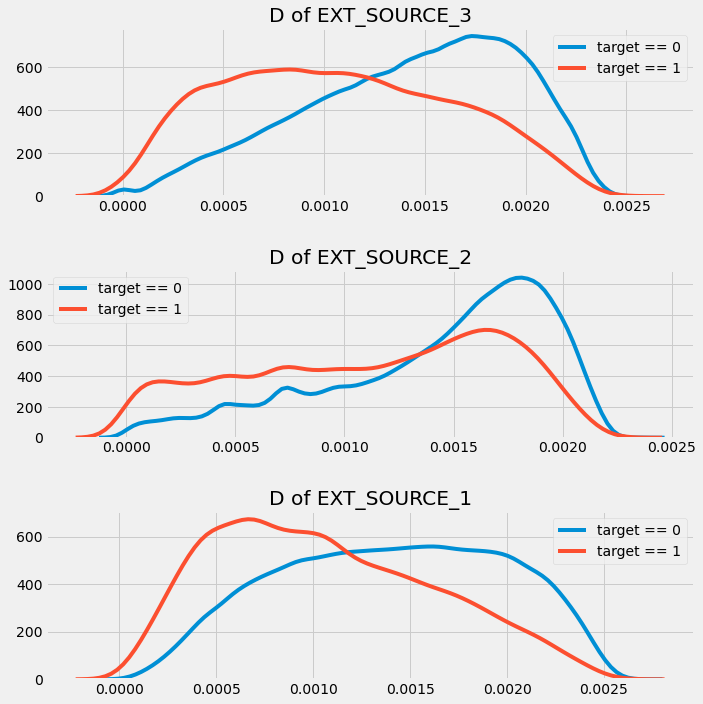

In [25]:
plt.figure(figsize=(10,10))
for i, source in enumerate(['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']):
    plt.subplot(3,1,i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET']==0, source]/365, label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET']==1, source]/365, label = 'target == 1')
    plt.title('D of %s' % source)
plt.tight_layout(h_pad = 2.5)
plt.show()

In [26]:
poly_features = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [27]:
imputer = SimpleImputer(strategy='median')
poly_target = poly_features['TARGET']
poly_features.drop(columns=['TARGET'], inplace = True)
poly_features = imputer.fit_transform(poly_features)

In [28]:
poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)

In [29]:
poly_features.shape

(307511, 35)

In [30]:
poly_transformer.get_feature_names(input_features=['TARGET','EXT_SOURCE_1','EXT_SOURCE_2',
                                                   'EXT_SOURCE_3','DAYS_BIRTH'])[:20]

['1',
 'TARGET',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'TARGET^2',
 'TARGET EXT_SOURCE_1',
 'TARGET EXT_SOURCE_2',
 'TARGET EXT_SOURCE_3',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_3^2',
 'TARGET^3',
 'TARGET^2 EXT_SOURCE_1',
 'TARGET^2 EXT_SOURCE_2',
 'TARGET^2 EXT_SOURCE_3',
 'TARGET EXT_SOURCE_1^2']

In [31]:
poly_features = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names(
    input_features=['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))
poly_features.head()

,1,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET^2,TARGET EXT_SOURCE_1,TARGET EXT_SOURCE_2,TARGET EXT_SOURCE_3,EXT_SOURCE_1^2,...,EXT_SOURCE_1^3,EXT_SOURCE_1^2 EXT_SOURCE_2,EXT_SOURCE_1^2 EXT_SOURCE_3,EXT_SOURCE_1 EXT_SOURCE_2^2,EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_1 EXT_SOURCE_3^2,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_3^3
0,1.0,0.083037,0.262949,0.139376,9461.0,0.006895,0.021834,0.011573,785.612748,0.069142,...,0.018181,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11
1,1.0,0.311267,0.622246,0.535276,16765.0,0.096887,0.193685,0.166614,5218.396475,0.387190,...,0.240927,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12
2,1.0,0.505998,0.555912,0.729567,19046.0,0.256034,0.281290,0.369159,9637.236584,0.309038,...,0.171798,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12
3,1.0,0.505998,0.650442,0.535276,19005.0,0.256034,0.329122,0.270849,9616.490669,0.423074,...,0.275185,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12
4,1.0,0.505998,0.322738,0.535276,19932.0,0.256034,0.163305,0.270849,10085.550751,0.104160,...,0.033616,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12


In [32]:
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how='left')
app_train_poly.head()

,SK_ID_CURR,TARGET_x,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_1^3,EXT_SOURCE_1^2 EXT_SOURCE_2,EXT_SOURCE_1^2 EXT_SOURCE_3,EXT_SOURCE_1 EXT_SOURCE_2^2,EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_1 EXT_SOURCE_3^2,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_3^3
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.018181,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.240927,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.171798,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.275185,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.033616,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12


In [33]:
app_train_domain = app_train.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

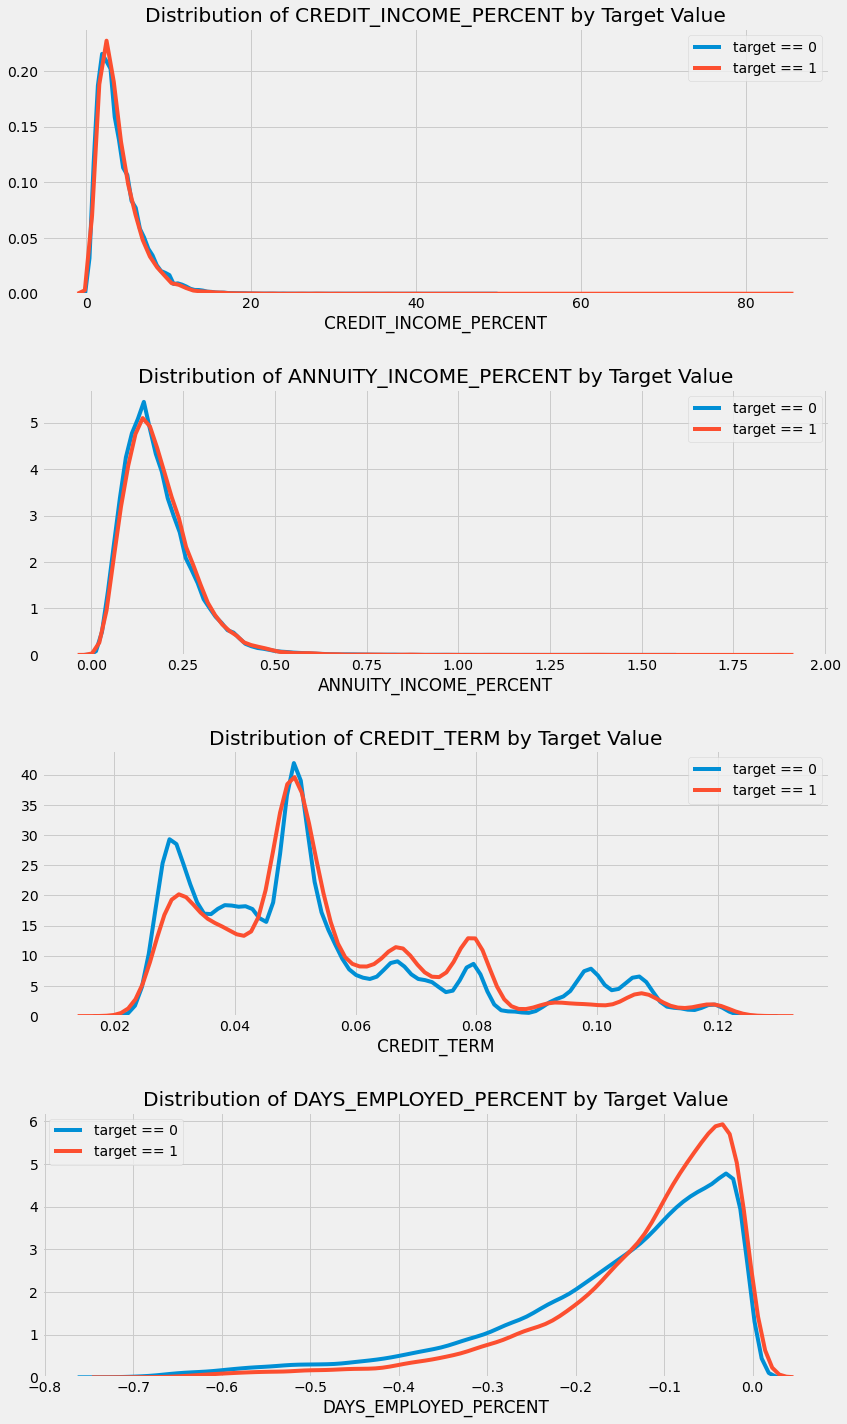

In [34]:
plt.figure(figsize = (12, 20))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT',
                             'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4, 1, i + 1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0, feature],
                label = 'target == 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1, feature],
                label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature)
plt.tight_layout(h_pad=2.5)
plt.show()

数据预处理

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
label = app_train['TARGET']
train = app_train.drop(columns = ['TARGET'])
train,test,y_train,y_test= train_test_split(train,label,test_size = 0.2,random_state = 0)
features = list(train.columns)

imputer = SimpleImputer(strategy='median')
std = StandardScaler()
#填充
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)
#标准化
std.fit(train)
train = std.transform(train)
test = std.transform(test)

In [36]:
test.shape

(61503, 243)

Basic model: logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=0.0001)
log_reg.fit(train,y_train)

LogisticRegression(C=0.0001)

In [38]:
predictions = log_reg.predict_proba(test)[:,1]

In [39]:
from sklearn.metrics import roc_auc_score
test_auc = roc_auc_score(y_test, predictions)
test_auc

0.7427453778558568

In [40]:
from sklearn.preprocessing import StandardScaler
app_train_poly = app_train_poly.drop(columns = ['TARGET_y'])
app_train_poly = app_train_poly.drop(columns = ['TARGET_x'])
train, test, y_train, y_test = train_test_split(app_train_poly, poly_target, test_size = 0.2, 
                                                random_state = 10)
features = list(train.columns)
imputer = SimpleImputer(strategy = 'median')
std = StandardScaler()

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

std.fit(train)
train = std.transform(train)
test = std.transform(test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state=1000, n_jobs = -1)
random_forest.fit(train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1000)

In [44]:
predictions = random_forest.predict_proba(test)[:,1]

In [45]:
test_auc = roc_auc_score(y_test, predictions)
test_auc

0.7066516893503028

In [57]:
#app_train_domain = app_train_domain.drop(columns=['TARGET'])
train, test, y_train, y_test = train_test_split(app_train_domain, label, test_size=0.2,
                                               random_state = 100)
features = list(train.columns)

imputer = SimpleImputer(strategy='median')

std = StandardScaler()

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

std.fit(train)
train = std.transform(train)
test = std.transform(test)

In [59]:
random_forest.fit(train, y_train)
predictions = random_forest.predict_proba(test)[:, -1]
test_auc = roc_auc_score(y_test, predictions)
test_auc

0.7108967912445928

LightBGM

In [62]:
import lightgbm as lgb
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary',
                          class_weight = 'balanced', learning_rate = 0.05,
                          reg_alpha = 0.1, reg_lambda = 0.1,
                          subsample = 0.8, n_jobs = -1, random_forest = 50)
model.fit(train, y_train, eval_metric = 'auc',
         eval_set = [(test, y_test), (train, y_train)],
         eval_names = ['test', 'train'],
         early_stopping_rounds = 100, verbose = 200)

[LightGBM] [Warning] Unknown parameter: random_forest
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.802735	train's binary_logloss: 0.543939	test's auc: 0.765796	test's binary_logloss: 0.559768
Early stopping, best iteration is:
[262]	train's auc: 0.812726	train's binary_logloss: 0.533776	test's auc: 0.766218	test's binary_logloss: 0.553654


LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               objective='binary', random_forest=50, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)